In [1]:
from creds import creds 
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
host = creds.host
port = creds.port
uname = creds.username
pwd = creds.password

In [3]:
dbname = 'pic'
conn = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}"
                           .format(host, port, dbname, uname, pwd))

In [5]:
sql = "select table_name FROM information_schema.tables WHERE table_schema='pic' AND table_type='BASE TABLE';"
pd.read_sql_query(sql, conn)

,table_name
0,admissions
1,d_labitems
2,d_items
3,emr_symptoms
4,surgery_info
5,diagnoses_icd
6,surgery_vital_signs
7,chartevents
8,icustays
9,d_icd_diagnoses


In [41]:
pd.read_sql_query('select count(distinct subject_id) from patients;', conn)

,count
0,12881


In [7]:
pd.read_sql_query("select column_name, data_type from information_schema.columns \
                  where table_schema = 'pic' and table_name = 'patients'", \
                  conn)


,column_name,data_type
0,row_id,smallint
1,subject_id,integer
2,gender,character varying
3,dob,timestamp without time zone
4,dod,timestamp without time zone
5,expire_flag,smallint


In [8]:
sql = "select * from patients limit 5;"
pd.read_sql_query(sql, conn)

,row_id,subject_id,gender,dob,dod,expire_flag
0,1,2,M,2068-11-30 00:00:00,2081-09-28 10:06:00,1
1,2,9,M,2104-03-09 00:00:00,NaT,0
2,3,56,F,2110-01-08 13:40:00,NaT,0
3,4,79,F,2094-08-25 00:00:00,NaT,0
4,5,96,M,2050-12-17 00:00:00,NaT,0


In [20]:
sql = 'select gender, count(distinct subject_id) from pic.patients group by gender;'
gender_distribution = pd.read_sql_query(sql, conn)
gender_distribution

,gender,count
0,F,5515
1,M,7366


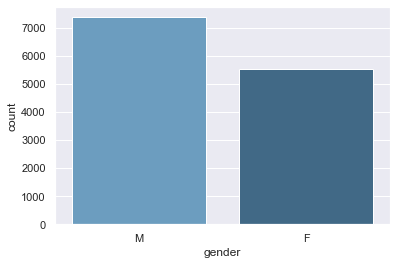

In [21]:
sns.set(style="darkgrid")

sns.barplot(y='count', x='gender', data=gender_distribution, palette="Blues_d", order=gender_distribution.sort_values('count', ascending=False).gender)
plt.show()

In [23]:
sql = 'select expire_flag, count(distinct subject_id) from pic.patients group by expire_flag;'
expired_distribution = pd.read_sql_query(sql, conn)
expired_distribution

,expire_flag,count
0,0,11921
1,1,960


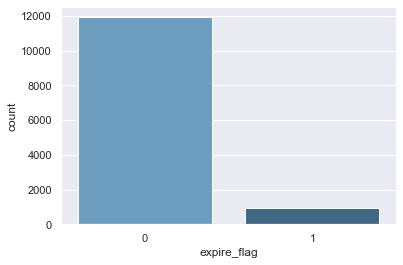

In [24]:
sns.set(style="darkgrid")

sns.barplot(y='count', x='expire_flag', data=expired_distribution, palette="Blues_d", order=expired_distribution.sort_values('count', ascending=False).expire_flag)
plt.show()

In [25]:
sql = 'select gender, expire_flag, count(distinct subject_id) from pic.patients group by gender, expire_flag;'
gender_exp_dist = pd.read_sql_query(sql, conn)
gender_exp_dist

,gender,expire_flag,count
0,F,0,5155
1,F,1,360
2,M,0,6766
3,M,1,600


In [10]:
sql = "select * from admissions limit 5;"
pd.read_sql_query(sql, conn)

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_department,discharge_department,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,icd10_code_cn,hospital_expire_flag,has_chartevents_data
0,1,26,100000,2098-11-09 18:30:55,2098-11-14 09:18:00,NaT,General ICU,General ICU,Self Pay,CHN,Not specified,Single,Han ethnic,2098-11-09 18:30:55,2098-11-14 09:18:00,肠粘膜炎,K52.901,0,0
1,2,28,100001,2104-09-03 10:36:47,2104-09-12 14:51:00,2104-09-12 14:51:00,General ICU,General ICU,Self Pay,CHN,Not specified,Single,Han ethnic,2104-09-03 10:36:47,2104-09-12 14:51:00,心肌炎,I51.403,1,0
2,3,29,100002,2062-11-29 20:52:52,2062-12-07 14:27:00,NaT,General ICU,General ICU,Self Pay,CHN,Not specified,Single,Han ethnic,2062-11-29 20:52:52,2062-12-07 14:27:00,溺水,T75.101,0,0
3,4,30,100003,2098-11-21 15:38:47,2098-11-26 01:33:00,2098-11-26 01:33:00,General ICU,General ICU,Discount,CHN,Not specified,Single,Han ethnic,2098-11-21 15:38:47,2098-11-26 01:33:00,None,None,1,0
4,5,31,100004,2071-11-13 19:43:13,2071-11-15 13:40:00,2071-11-15 13:40:00,General ICU,General ICU,Self Pay,CHN,Not specified,Single,Han ethnic,2071-11-13 19:43:13,2071-11-15 13:40:00,腹泻病,K52.904,1,0


In [40]:
pd.read_sql_query('select count(distinct subject_id) from admissions;', conn)

,count
0,12881


In [43]:
sql = 'select ethnicity, count(distinct hadm_id) from pic.admissions group by ethnicity order by count desc;'
ethnicity = pd.read_sql_query(sql, conn)
ethnicity

,ethnicity,count
0,Han ethnic,13300
1,Others,52
2,Miao ethnic,43
3,Buyei ethnic,19
4,Tujia ethnic,15
5,Yi ethnic,11
6,Hui ethnic,9


In [44]:
sql = 'select ethnicity, count(distinct subject_id) from pic.admissions group by ethnicity order by count desc;'
ethnicity = pd.read_sql_query(sql, conn)
ethnicity

,ethnicity,count
0,Han ethnic,12736
1,Others,51
2,Miao ethnic,43
3,Buyei ethnic,19
4,Tujia ethnic,15
5,Yi ethnic,11
6,Hui ethnic,9


In [49]:
sql = 'select language, count(distinct hadm_id) from pic.admissions group by language order by count desc;'
insurance = pd.read_sql_query(sql, conn)
insurance

,language,count
0,CHN,13449


In [50]:
sql = 'select insurance, count(distinct hadm_id) from pic.admissions group by insurance order by count desc;'
insurance = pd.read_sql_query(sql, conn)
insurance

,insurance,count
0,Premiums Pay,7790
1,Medical Insurance,2818
2,the General Card,2393
3,Self Pay,348
4,Foundation,73
5,Discount,27


In [32]:
sql = 'select admission_department, count(distinct hadm_id) from pic.admissions group by admission_department order by count desc;'
admission_source = pd.read_sql_query(sql, conn)
admission_source

,admission_department,count
0,NICU,2320
1,Cardiac surgery department,2190
2,General ICU,1857
3,PICU,1451
4,Burn/Neurosurgery department,1329
5,General surgery/Neonatology surgery department,1071
6,Thoracic surgery/Oncology department,940
7,General surgery/Endoscopy department,361
8,Urinary surgery department(2),238
9,General surgery department,218


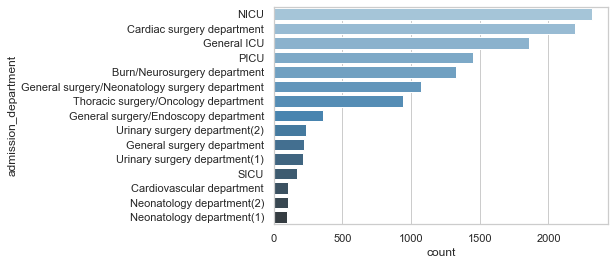

In [33]:
sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")

sql = 'select admission_department, count(distinct hadm_id) from pic.admissions group by admission_department order by count desc limit 15;'
admission_source = pd.read_sql_query(sql, conn)

sns.barplot(y='admission_department', x='count', data=admission_source, palette="Blues_d", order=admission_source.sort_values('count', ascending=False).admission_department)
plt.show()

In [37]:
sql2 = 'select discharge_department, count(distinct hadm_id) from pic.admissions group by discharge_department order by count desc;'
discharge_dest = pd.read_sql_query(sql2, conn)
discharge_dest

,discharge_department,count
0,NICU,2320
1,Cardiac surgery department,2190
2,General ICU,1857
3,PICU,1451
4,Burn/Neurosurgery department,1329
5,General surgery/Neonatology surgery department,1071
6,Thoracic surgery/Oncology department,940
7,General surgery/Endoscopy department,361
8,Urinary surgery department(2),238
9,General surgery department,218


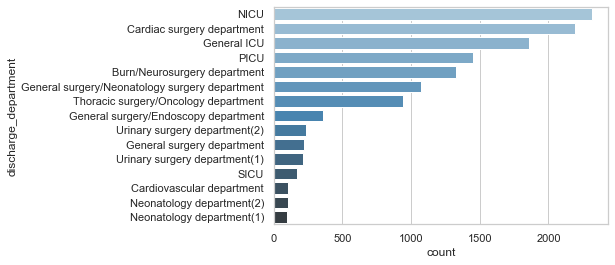

In [38]:
sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")

sql = 'select discharge_department, count(distinct hadm_id) from pic.admissions group by discharge_department order by count desc limit 15;'
discharge_dest = pd.read_sql_query(sql, conn)

sns.barplot(y='discharge_department', x='count', data=discharge_dest, palette="Blues_d", order=discharge_dest.sort_values('count', ascending=False).discharge_department)
plt.show()

In [52]:
sql = 'select diagnosis, count(distinct hadm_id) from pic.admissions group by diagnosis order by count desc;'
diagnoses = pd.read_sql_query(sql, conn)
diagnoses

,diagnosis,count
0,早产儿,977
1,肺炎,795
2,室间隔缺损,705
3,先天性心脏病,571
4,房间隔缺损,444
...,...,...
1058,新生儿肺透明膜病,1
1059,新生儿缺氧缺血性脑病,1
1060,新生儿结膜炎,1
1061,新生儿红细胞增多性黄疸,1


In [53]:
pd.read_sql_query('select * from d_icd_diagnoses limit 10;', conn)

,row_id,icd10_code_cn,icd10_code,title_cn,title
0,1,A00.000,A00.0,古典生物型霍乱,"Cholera due to Vibrio cholerae 01, biovar chol..."
1,2,A00.100,A00.1,埃尔托型霍乱,"Cholera due to Vibrio cholerae 01, biovar eltor"
2,3,A00.900,A00.9,霍乱,"Cholera, unspecified"
3,4,A01.000,A01.0,伤寒,Typhoid fever
4,5,A01.001,A01.0,伤寒,Typhoid fever
5,6,A01.001+,A01.0,伤寒性肝炎,Typhoid fever
6,7,A01.002+,A01.0,伤寒性脑膜炎,Typhoid fever
7,8,A01.003,A01.0,伤寒性脑膜炎,Typhoid fever
8,9,A01.100,A01.1,副伤寒甲,Paratyphoid fever A
9,10,A01.200,A01.2,副伤寒乙,Paratyphoid fever B


In [57]:
sql = 'select * from admissions tbl1 \
        left join (select icd10_code_cn as icd_cn, title from d_icd_diagnoses) as tbl2 on \
        tbl1.icd10_code_cn = tbl2.icd_cn;'

In [60]:
admissions_df = pd.read_sql_query(sql, conn)

In [61]:
admissions_df.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_department,discharge_department,insurance,language,...,marital_status,ethnicity,edregtime,edouttime,diagnosis,icd10_code_cn,hospital_expire_flag,has_chartevents_data,icd_cn,title
0,1,26,100000,2098-11-09 18:30:55,2098-11-14 09:18:00,NaT,General ICU,General ICU,Self Pay,CHN,...,Single,Han ethnic,2098-11-09 18:30:55,2098-11-14 09:18:00,肠粘膜炎,K52.901,0,0,K52.901,"Noninfective gastroenteritis and colitis, unsp..."
1,2,28,100001,2104-09-03 10:36:47,2104-09-12 14:51:00,2104-09-12 14:51:00,General ICU,General ICU,Self Pay,CHN,...,Single,Han ethnic,2104-09-03 10:36:47,2104-09-12 14:51:00,心肌炎,I51.403,1,0,I51.403,"Myocarditis, unspecified"
2,3,29,100002,2062-11-29 20:52:52,2062-12-07 14:27:00,NaT,General ICU,General ICU,Self Pay,CHN,...,Single,Han ethnic,2062-11-29 20:52:52,2062-12-07 14:27:00,溺水,T75.101,0,0,T75.101,Drowning and nonfatal submersion
3,4,30,100003,2098-11-21 15:38:47,2098-11-26 01:33:00,2098-11-26 01:33:00,General ICU,General ICU,Discount,CHN,...,Single,Han ethnic,2098-11-21 15:38:47,2098-11-26 01:33:00,None,None,1,0,None,None
4,5,31,100004,2071-11-13 19:43:13,2071-11-15 13:40:00,2071-11-15 13:40:00,General ICU,General ICU,Self Pay,CHN,...,Single,Han ethnic,2071-11-13 19:43:13,2071-11-15 13:40:00,腹泻病,K52.904,1,0,K52.904,"Noninfective gastroenteritis and colitis, unsp..."


In [65]:
admissions_df.groupby('title').size().sort_values(ascending=False)

title
Other preterm infants                                       977
Pneumonitis due to oils and essences                        795
Ventricular septal defect                                   707
Congenital malformation of heart, unspecified               599
Atrial septal defect                                        458
                                                           ... 
Other and unspecified abnormalities of heart beat             1
Other and unspecified abnormalities of gait and mobility      1
Open wound of scalp                                           1
Open wound of other parts of head                             1
Other hypoglycaemia                                           1
Length: 836, dtype: int64

In [93]:
admission_dx = admissions_df.groupby('title').size().sort_values(ascending=False).reset_index(name='count')

In [94]:
admission_dx

,title,count
0,Other preterm infants,977
1,Pneumonitis due to oils and essences,795
2,Ventricular septal defect,707
3,"Congenital malformation of heart, unspecified",599
4,Atrial septal defect,458
...,...,...
831,Other and unspecified abnormalities of heart beat,1
832,Other and unspecified abnormalities of gait an...,1
833,Open wound of scalp,1
834,Open wound of other parts of head,1


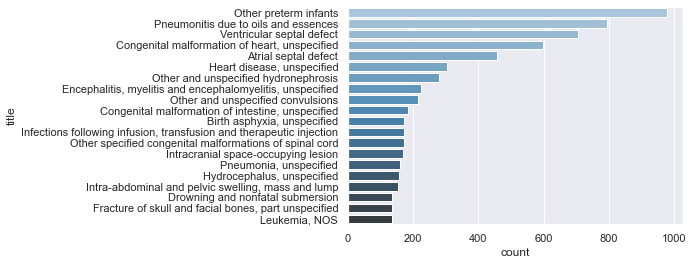

In [95]:
admission_dx_plot = admission_dx[:20]
sns.barplot(y='title', x='count', data=admission_dx_plot, palette="Blues_d", order=admission_dx_plot.sort_values('count', ascending=False).title)
plt.show()